In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Abd Elrahman\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
data=pd.read_excel(r"C:\Users\Abd Elrahman\Downloads\Grinta -DataScientist- Case Study.xlsx")
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
#Data Cleaning and Data Pre-processing


In [6]:
#Handling the missing values
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
data=data.dropna(subset=["Description"])
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

In [8]:
data['CustomerID']=data['CustomerID'].fillna(0)
data.isnull().sum()

C:\Users\Abd Elrahman\AppData\Local\Temp\ipykernel_8544\760833787.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['CustomerID']=data['CustomerID'].fillna(0)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
#Drop duplicates

In [10]:
data.duplicated().sum()

5268

In [11]:
data=data.drop_duplicates()

In [12]:
data.duplicated().sum()

0

In [13]:
#Exploring some statistical values about the numerical data
data.describe()

,Quantity,UnitPrice,CustomerID
count,535187.000000,535187.000000,535187.000000
mean,9.671593,4.645242,11466.973804
std,219.059056,97.364810,6778.037985
min,-80995.000000,-11062.060000,0.000000
25%,1.000000,1.250000,12348.000000
50%,3.000000,2.080000,14360.000000
75%,10.000000,4.130000,16242.000000
max,80995.000000,38970.000000,18287.000000


In [14]:
#Ensuring consistent formating
data['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

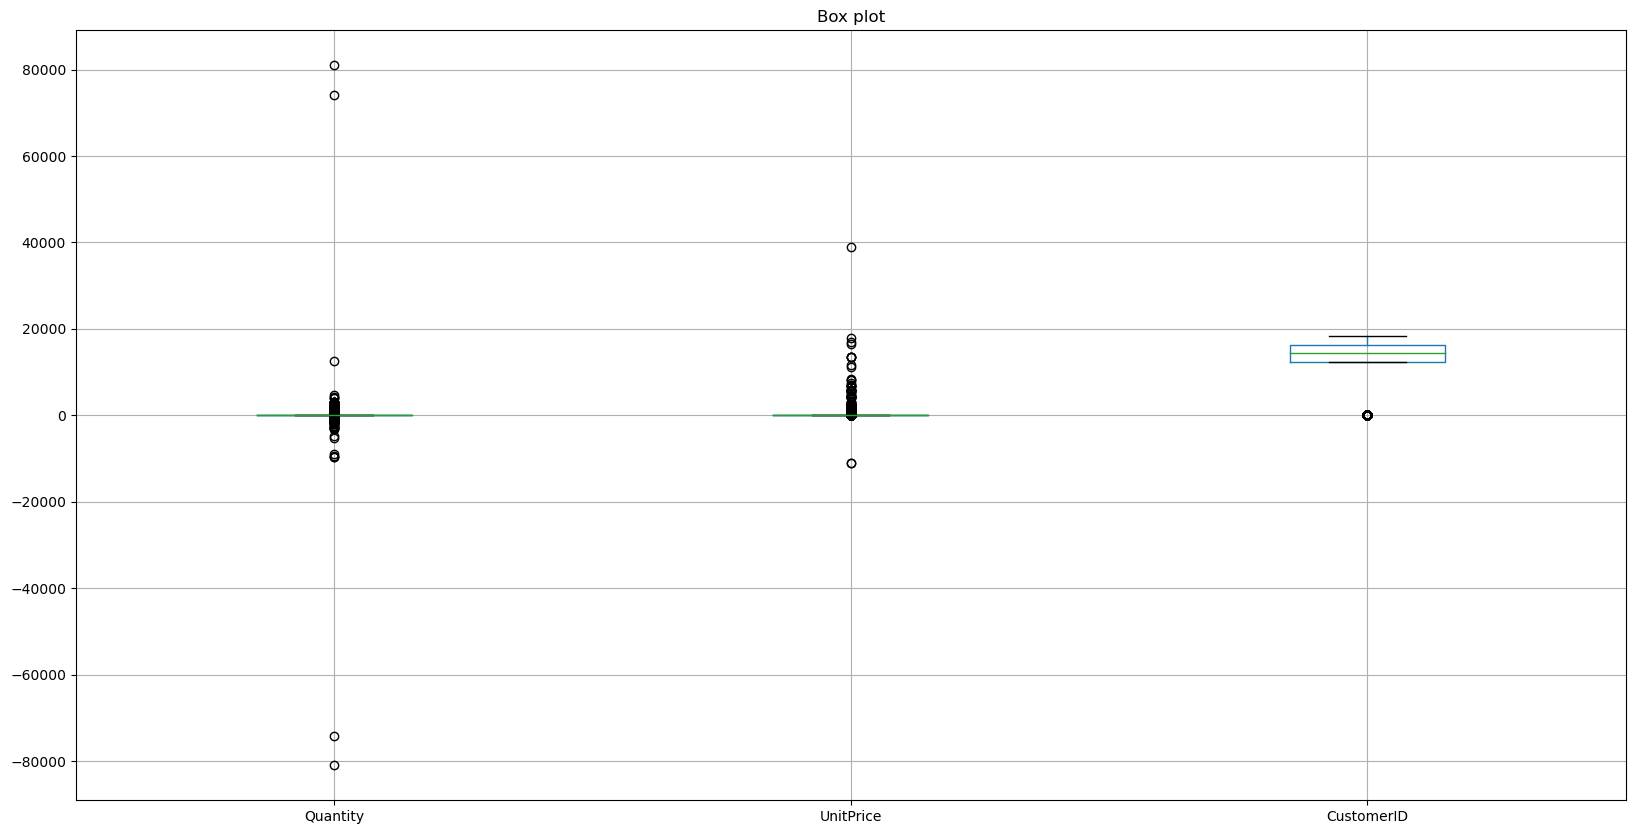

In [15]:
plt.figure(figsize=(20,10))
data.boxplot()
plt.title('Box plot')
plt.show()

In [16]:
#handling outliers
Q1=data['Quantity'].quantile(0.25)
Q3=data['Quantity'].quantile(0.75)
IQR=Q3-Q1
Lower_bound=Q1 - 1.5*IQR
Upper_bound=Q3 + 1.5*IQR

In [17]:
data[(data['Quantity']>Upper_bound) | (data['Quantity']<Lower_bound)]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583.0,France
...,...,...,...,...,...,...,...,...
541876,581585,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,24,2011-12-09 12:31:00,0.85,15804.0,United Kingdom
541882,581585,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-12-09 12:31:00,0.42,15804.0,United Kingdom
541883,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,2011-12-09 12:31:00,0.42,15804.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom


In [18]:
data = data[(data['Quantity'] >= Lower_bound) & (data['Quantity'] <= Upper_bound)]

In [19]:
data[(data['Quantity']>Upper_bound) | (data['Quantity']<Lower_bound)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [20]:
Q1=data['UnitPrice'].quantile(0.25)
Q3=data['UnitPrice'].quantile(0.75)
IQR=Q3-Q1
Lower_bound=Q1 - 1.5*IQR
Upper_bound=Q3 + 1.5*IQR

In [21]:
data[(data['UnitPrice']>Upper_bound) | (data['UnitPrice']<Lower_bound)]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
16,536367,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2010-12-01 08:34:00,9.95,13047.0,United Kingdom
45,536370,POST,POSTAGE,3,2010-12-01 08:45:00,18.00,12583.0,France
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
151,536382,22839,3 TIER CAKE TIN GREEN AND CREAM,2,2010-12-01 09:45:00,14.95,16098.0,United Kingdom
152,536382,22838,3 TIER CAKE TIN RED AND CREAM,2,2010-12-01 09:45:00,14.95,16098.0,United Kingdom
...,...,...,...,...,...,...,...,...
541763,581574,23111,PARISIENNE SEWING BOX,2,2011-12-09 12:09:00,12.50,12526.0,Germany
541767,581574,POST,POSTAGE,2,2011-12-09 12:09:00,18.00,12526.0,Germany
541768,581578,POST,POSTAGE,3,2011-12-09 12:16:00,18.00,12713.0,Germany
541786,581578,22622,BOX OF VINTAGE ALPHABET BLOCKS,6,2011-12-09 12:16:00,11.95,12713.0,Germany


In [22]:
data = data[(data['UnitPrice'] >= Lower_bound) & (data['UnitPrice'] <= Upper_bound)]

In [23]:
data[(data['UnitPrice']>Upper_bound) | (data['UnitPrice']<Lower_bound)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
#EDA

In [24]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,444990.000000,444990.000000,444990.000000
mean,4.805506,2.792154,11309.830142
std,4.602407,2.041378,6905.756099
min,-12.000000,0.000000,0.000000
25%,1.000000,1.250000,0.000000
50%,3.000000,2.100000,14388.000000
75%,8.000000,3.750000,16284.000000
max,23.000000,8.620000,18287.000000


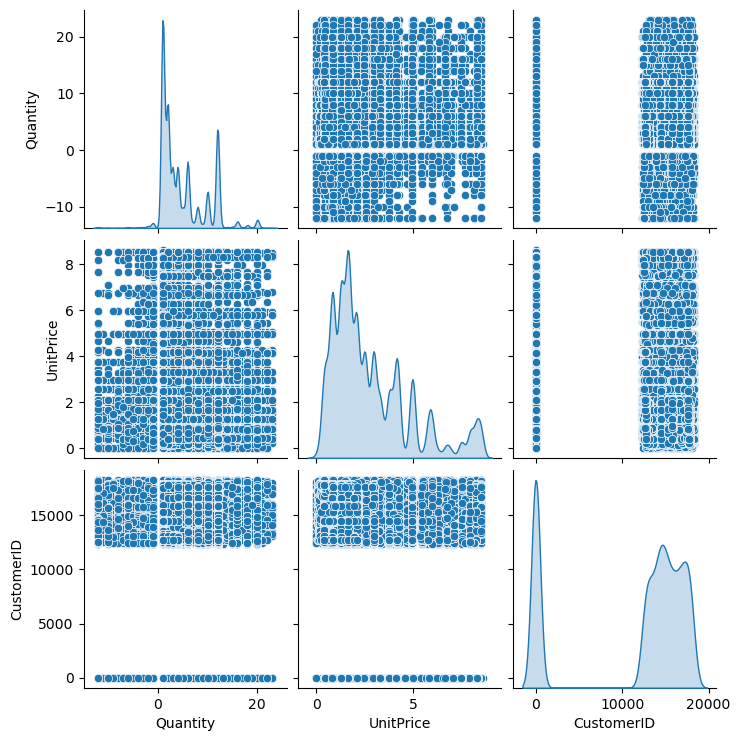

In [25]:
sns.pairplot(data,diag_kind='kde')
plt.show()

In [26]:
data['InvoiceNo'] = data['InvoiceNo'].astype(str)
return_invoices = data[data['InvoiceNo'].apply(lambda x: 'C' in x)]
return_invoices

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897.0,United Kingdom
...,...,...,...,...,...,...,...,...
540176,C581470,23084,RABBIT NIGHT LIGHT,-4,2011-12-08 19:28:00,2.08,17924.0,United Kingdom
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,2011-12-09 09:57:00,1.95,14397.0,United Kingdom
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


C:\Users\Abd Elrahman\AppData\Local\Temp\ipykernel_8544\4049981317.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return_invoices['AbsoluteQuantity'] = return_invoices['Quantity'].abs()


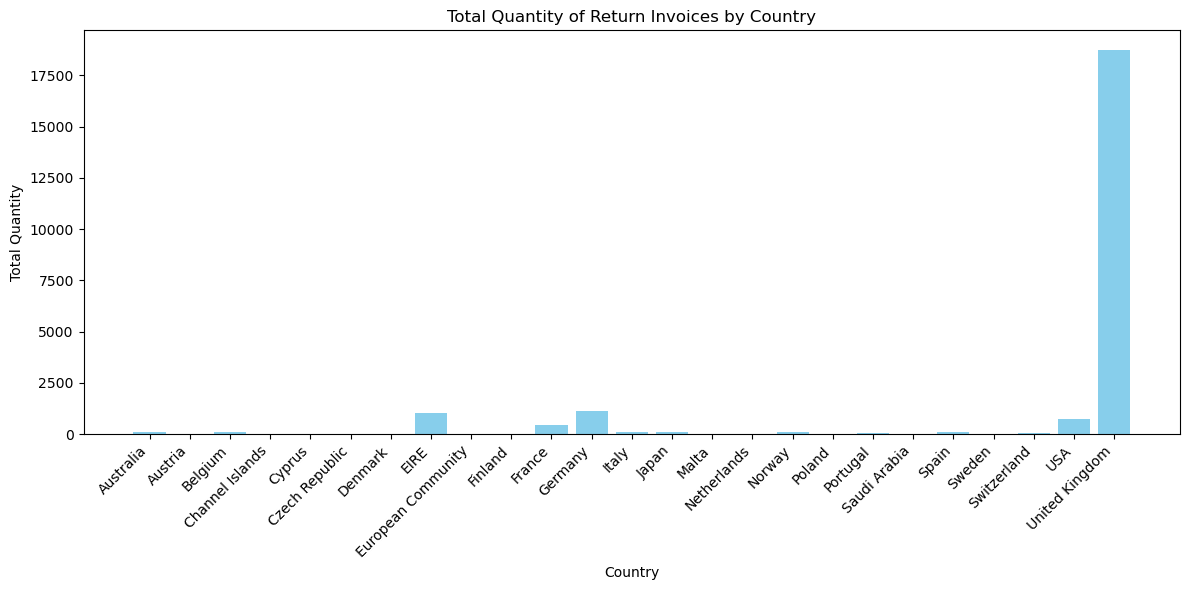

In [27]:
return_invoices['AbsoluteQuantity'] = return_invoices['Quantity'].abs()

country_quantities = return_invoices.groupby('Country')['AbsoluteQuantity'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(country_quantities['Country'], country_quantities['AbsoluteQuantity'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Quantity')
plt.title('Total Quantity of Return Invoices by Country')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [28]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])

# Extract month and year from 'InvoiceDate'
data['Month'] = data['InvoiceDate'].dt.month
data['Year'] = data['InvoiceDate'].dt.year

In [29]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,2011
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,2011
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011


In [30]:
monthly_sales = data.groupby(['Year', 'Month']).agg({
    'Quantity': 'sum',
    'UnitPrice': 'sum'
}).reset_index()

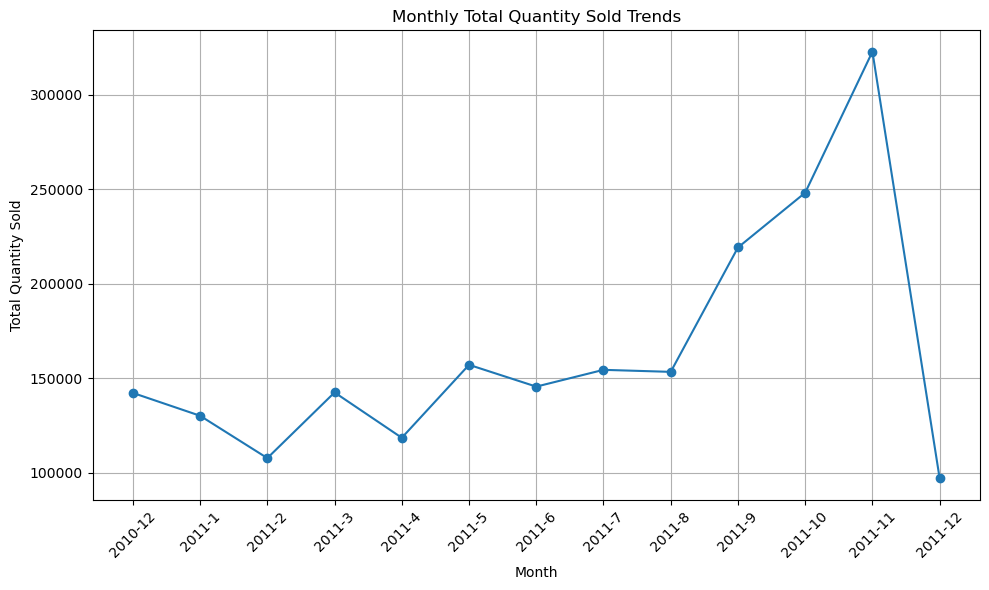

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str), monthly_sales['Quantity'], marker='o')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.title('Monthly Total Quantity Sold Trends')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
#Clustering using K-means

In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

In [33]:
X=data[['Quantity','UnitPrice','Country']]

In [34]:
categorical_features = ['Country']
categorical_transformer = OneHotEncoder()

In [35]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)])


In [36]:
X_processed = preprocessor.fit_transform(X)

In [37]:
kmeans = KMeans(n_clusters=6, random_state=42)
data['clusters'] = kmeans.fit_predict(X_processed)
np.unique(data['clusters'])

array([0, 1, 2, 3, 4, 5])

In [38]:
inertia = kmeans.inertia_

In [39]:
calinski_harabasz = calinski_harabasz_score(X_processed.toarray(), data['clusters'])


In [40]:
davies_bouldin = davies_bouldin_score(X_processed.toarray(), data['clusters'])


In [41]:
print(f'Inertia: {inertia}')
print(f'Calinski-Harabasz Index: {calinski_harabasz}')
print(f'Davies-Bouldin Index: {davies_bouldin}')

Inertia: 18733.976129148792
Calinski-Harabasz Index: 206583.04561099637
Davies-Bouldin Index: 0.03869602071637828


In [42]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,clusters
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,0
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,2011,1
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,2011,1
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011,1
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011,1


In [43]:
cluster_analysis = data.groupby('clusters').agg({
    'Quantity': 'sum',
    'UnitPrice': 'mean',
    'InvoiceNo': 'count'
}).rename(columns={'InvoiceNo': 'Count'}).reset_index()


In [44]:
top_contributors = cluster_analysis.sort_values(by='Quantity', ascending=False).head(3)
print(f'Top contributors :\n {top_contributors}')


Top contributors :
    clusters  Quantity  UnitPrice   Count
0         0   1952937   2.795197  422021
2         2     59842   2.638664    7185
1         1     54252   2.539947    6458


In [113]:
slow_moving_products = cluster_analysis.sort_values(by='Quantity' ,ascending=True).head(3)
print(f'Slow moving products :\n {slow_moving_products}')


Slow moving products :
    clusters  Quantity  UnitPrice  Count
4         4     12940   2.759680   1937
5         5     13439   2.685257   1594
3         3     44992   3.082192   5795


In [46]:
commonly_grouped_products = data.groupby('clusters')['StockCode'].apply(lambda x: x.value_counts().index[0]).reset_index()
print(f'commonly grouped products :\n {commonly_grouped_products}')


commonly grouped products :
    clusters StockCode
0         0    85123A
1         1     22326
2         2     22326
3         3     22699
4         4     22960
5         5     22326


In [47]:
data[data['clusters']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,clusters
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,2010,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,2010,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,2010,0
...,...,...,...,...,...,...,...,...,...,...,...
541887,581585,23328,SET 6 SCHOOL MILK BOTTLES IN CRATE,4,2011-12-09 12:31:00,3.75,15804.0,United Kingdom,12,2011,0
541888,581585,23145,ZINC T-LIGHT HOLDER STAR LARGE,12,2011-12-09 12:31:00,0.95,15804.0,United Kingdom,12,2011,0
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,12,2011,0
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,12,2011,0


In [48]:
data[data['clusters']==1]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,clusters
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France,12,2010,1
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France,12,2010,1
33,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,2010-12-01 08:45:00,2.95,12583.0,France,12,2010,1
38,536370,22661,CHARLOTTE BAG DOLLY GIRL DESIGN,20,2010-12-01 08:45:00,0.85,12583.0,France,12,2010,1
41,536370,21913,VINTAGE SEASIDE JIGSAW PUZZLES,12,2010-12-01 08:45:00,3.75,12583.0,France,12,2010,1
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,12,2011,1
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12,2011,1
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011,1
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,12,2011,1


In [49]:
data[data['clusters']==2]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,clusters
1109,536527,22809,SET OF 6 T-LIGHTS SANTA,6,2010-12-01 13:04:00,2.95,12662.0,Germany,12,2010,2
1110,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,2010-12-01 13:04:00,2.55,12662.0,Germany,12,2010,2
1111,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,2010-12-01 13:04:00,0.85,12662.0,Germany,12,2010,2
1112,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,2010-12-01 13:04:00,1.65,12662.0,Germany,12,2010,2
1113,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,2010-12-01 13:04:00,1.95,12662.0,Germany,12,2010,2
...,...,...,...,...,...,...,...,...,...,...,...
541801,581578,22993,SET OF 4 PANTRY JELLY MOULDS,12,2011-12-09 12:16:00,1.25,12713.0,Germany,12,2011,2
541802,581578,22907,PACK OF 20 NAPKINS PANTRY DESIGN,12,2011-12-09 12:16:00,0.85,12713.0,Germany,12,2011,2
541803,581578,22908,PACK OF 20 NAPKINS RED APPLES,12,2011-12-09 12:16:00,0.85,12713.0,Germany,12,2011,2
541804,581578,23215,JINGLE BELL HEART ANTIQUE SILVER,12,2011-12-09 12:16:00,2.08,12713.0,Germany,12,2011,2


In [50]:
data[data['clusters']==3]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,clusters
1405,536540,85071A,BLUE CHARLIE+LOLA PERSONAL DOORSIGN,6,2010-12-01 14:05:00,2.95,14911.0,EIRE,12,2010,3
1406,536540,85071C,"CHARLIE+LOLA""EXTREMELY BUSY"" SIGN",6,2010-12-01 14:05:00,2.55,14911.0,EIRE,12,2010,3
1408,536540,21579,LOLITA DESIGN COTTON TOTE BAG,6,2010-12-01 14:05:00,2.25,14911.0,EIRE,12,2010,3
1409,536540,21576,LETS GO SHOPPING COTTON TOTE BAG,6,2010-12-01 14:05:00,2.25,14911.0,EIRE,12,2010,3
1410,536540,22147,FELTCRAFT BUTTERFLY HEARTS,12,2010-12-01 14:05:00,1.45,14911.0,EIRE,12,2010,3
...,...,...,...,...,...,...,...,...,...,...,...
539151,581433,22192,BLUE DINER WALL CLOCK,2,2011-12-08 15:54:00,8.50,14911.0,EIRE,12,2011,3
539152,581433,48187,DOORMAT NEW ENGLAND,2,2011-12-08 15:54:00,8.25,14911.0,EIRE,12,2011,3
539153,581433,48184,DOORMAT ENGLISH ROSE,2,2011-12-08 15:54:00,8.25,14911.0,EIRE,12,2011,3
539154,581433,20685,DOORMAT RED RETROSPOT,2,2011-12-08 15:54:00,8.25,14911.0,EIRE,12,2011,3


In [51]:
data[data['clusters']==4]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,clusters
21566,538095,22212,FOUR HOOK WHITE LOVEBIRDS,1,2010-12-09 14:55:00,2.10,17097.0,Spain,12,2010,4
21567,538095,22953,BIRTHDAY PARTY CORDON BARRIER TAPE,1,2010-12-09 14:55:00,1.25,17097.0,Spain,12,2010,4
21568,538095,84818,DANISH ROSE PHOTO FRAME,1,2010-12-09 14:55:00,2.55,17097.0,Spain,12,2010,4
21569,538095,21114,LAVENDER SCENTED FABRIC HEART,5,2010-12-09 14:55:00,1.25,17097.0,Spain,12,2010,4
21570,538095,84692,BOX OF 24 COCKTAIL PARASOLS,1,2010-12-09 14:55:00,0.42,17097.0,Spain,12,2010,4
...,...,...,...,...,...,...,...,...,...,...,...
535271,581193,23291,DOLLY GIRL CHILDRENS CUP,2,2011-12-07 17:05:00,1.25,17097.0,Spain,12,2011,4
535272,581193,85232D,SET/3 DECOUPAGE STACKING TINS,1,2011-12-07 17:05:00,4.95,17097.0,Spain,12,2011,4
535273,581193,22721,SET OF 3 CAKE TINS SKETCHBOOK,2,2011-12-07 17:05:00,1.95,17097.0,Spain,12,2011,4
535274,581193,23241,TREASURE TIN GYMKHANA DESIGN,1,2011-12-07 17:05:00,2.08,17097.0,Spain,12,2011,4


In [52]:
data[data['clusters']==5]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,clusters
7279,537026,84375,SET OF 20 KIDS COOKIE CUTTERS,12,2010-12-03 16:35:00,2.10,12395.0,Belgium,12,2010,5
7286,537026,22551,PLASTERS IN TIN SPACEBOY,12,2010-12-03 16:35:00,1.65,12395.0,Belgium,12,2010,5
7287,537026,85099B,JUMBO BAG RED RETROSPOT,10,2010-12-03 16:35:00,1.95,12395.0,Belgium,12,2010,5
7288,537026,22355,CHARLOTTE BAG SUKI DESIGN,10,2010-12-03 16:35:00,0.85,12395.0,Belgium,12,2010,5
34461,539391,22801,ANTIQUE GLASS PEDESTAL BOWL,4,2010-12-17 11:51:00,3.75,12417.0,Belgium,12,2010,5
...,...,...,...,...,...,...,...,...,...,...,...
541193,581493,20724,RED RETROSPOT CHARLOTTE BAG,10,2011-12-09 10:10:00,0.85,12423.0,Belgium,12,2011,5
541194,581493,23204,CHARLOTTE BAG APPLES DESIGN,10,2011-12-09 10:10:00,0.85,12423.0,Belgium,12,2011,5
541195,581493,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,18,2011-12-09 10:10:00,0.79,12423.0,Belgium,12,2011,5
541196,581493,22252,BIRDCAGE DECORATION TEALIGHT HOLDER,12,2011-12-09 10:10:00,1.25,12423.0,Belgium,12,2011,5


In [53]:
data2=data[['InvoiceNo','StockCode','Quantity','UnitPrice','Country','Month','Year']]
data2

,InvoiceNo,StockCode,Quantity,UnitPrice,Country,Month,Year
0,536365,85123A,6,2.55,United Kingdom,12,2010
1,536365,71053,6,3.39,United Kingdom,12,2010
2,536365,84406B,8,2.75,United Kingdom,12,2010
3,536365,84029G,6,3.39,United Kingdom,12,2010
4,536365,84029E,6,3.39,United Kingdom,12,2010
...,...,...,...,...,...,...,...
541904,581587,22613,12,0.85,France,12,2011
541905,581587,22899,6,2.10,France,12,2011
541906,581587,23254,4,4.15,France,12,2011
541907,581587,23255,4,4.15,France,12,2011


In [54]:
data2['Sales']=data2['Quantity']*data2['UnitPrice']
data2

C:\Users\Abd Elrahman\AppData\Local\Temp\ipykernel_8544\125392489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Sales']=data2['Quantity']*data2['UnitPrice']


,InvoiceNo,StockCode,Quantity,UnitPrice,Country,Month,Year,Sales
0,536365,85123A,6,2.55,United Kingdom,12,2010,15.30
1,536365,71053,6,3.39,United Kingdom,12,2010,20.34
2,536365,84406B,8,2.75,United Kingdom,12,2010,22.00
3,536365,84029G,6,3.39,United Kingdom,12,2010,20.34
4,536365,84029E,6,3.39,United Kingdom,12,2010,20.34
...,...,...,...,...,...,...,...,...
541904,581587,22613,12,0.85,France,12,2011,10.20
541905,581587,22899,6,2.10,France,12,2011,12.60
541906,581587,23254,4,4.15,France,12,2011,16.60
541907,581587,23255,4,4.15,France,12,2011,16.60


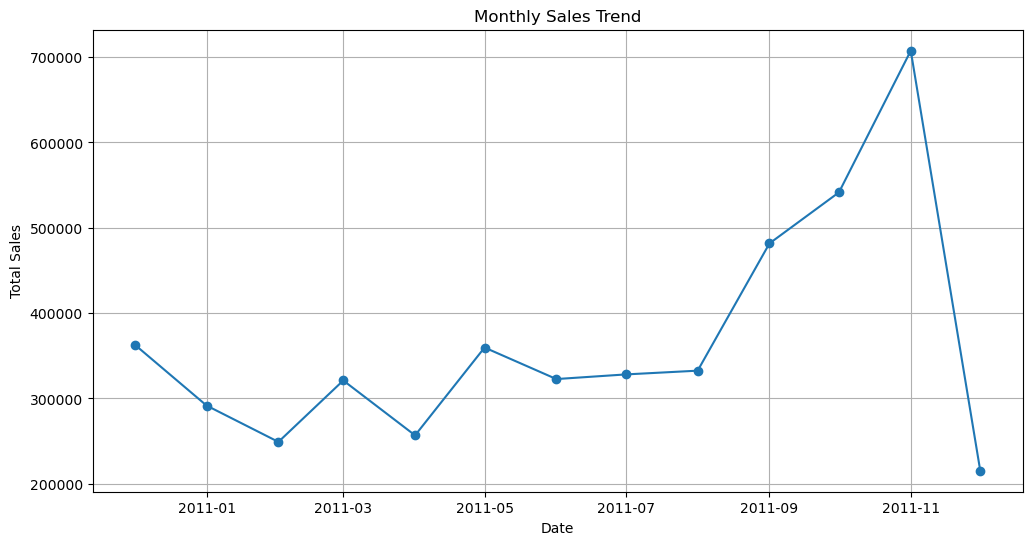

In [55]:
monthly_sales = data2.groupby(['Year', 'Month']).agg({'Sales': 'sum'}).reset_index()

# Convert 'Year' and 'Month' to a single datetime column for plotting
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))

# Sort by date to ensure the trend is plotted correctly
monthly_sales = monthly_sales.sort_values('Date')

# Plot the sales trend
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Date'], monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [ ]:
#Regression using LinearRegression, DecisionTreeRegressor, RandomForestRegressor

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [84]:
X = data2[['Quantity', 'UnitPrice', 'Country', 'Month', 'Year']]
y = data2['Sales']

In [85]:
categorical_features = ['Country']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features),
        ])

In [86]:
X_processed = preprocessor.fit_transform(X)

In [87]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)

# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [88]:
# Make Predictions
y_pred=model.predict(X_test)

In [93]:
# Model Evaluation
print(f'mean absolute error: {mean_absolute_error(y_test,y_pred)}')
print(f'mean squared error: {mean_squared_error(y_test,y_pred)}')


mean absolute error: 7.914042338607133
mean squared error: 144.0312933400769


In [90]:
model_DT = DecisionTreeRegressor(random_state=42)
model_DT.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [91]:
y_pred_DT=model_DT.predict(X_test)

In [94]:
# Model Evaluation
print(f'mean absolute error :{mean_absolute_error(y_test,y_pred_DT)}')
print(f'mean squared error :{mean_squared_error(y_test,y_pred_DT)}')

mean absolute error :7.914038532782965
mean squared error :144.03128747524937


In [98]:
model_RF = RandomForestRegressor(random_state=42)
model_RF.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [99]:
y_pred_RF=model_RF.predict(X_test)

In [100]:
# Model Evaluation
print(f'mean absolute error :{mean_absolute_error(y_test,y_pred_DT)}')
print(f'mean squared error :{mean_squared_error(y_test,y_pred_DT)}')

mean absolute error :7.914038532782965
mean squared error :144.03128747524937


Future sales predictions for the next month: [10.18892978]


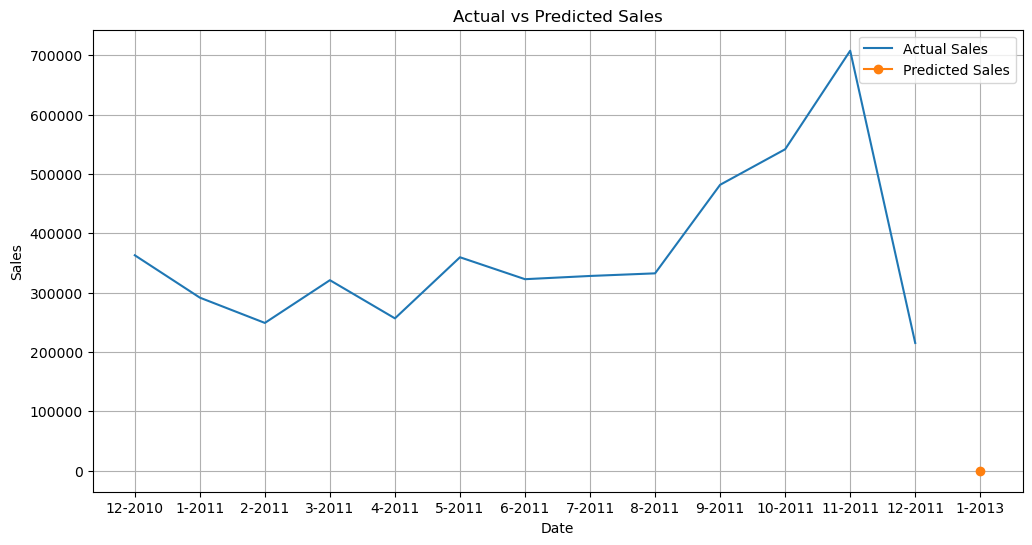

In [101]:
future_data = pd.DataFrame({
    'Month': [monthly_sales['Month'].max() + 1],
    'Year': [monthly_sales['Year'].max()] if monthly_sales['Month'].max() < 12 else [monthly_sales['Year'].max() + 1],
    'Quantity': [0],
    'UnitPrice': [0],
    'Country': ['United Kingdom']  
})

if future_data['Month'].iloc[0] > 12:
    future_data['Month'] = 1
    future_data['Year'] += 1

future_data_processed = preprocessor.transform(future_data)

future_predictions = model.predict(future_data_processed)

print(f'Future sales predictions for the next month: {future_predictions}')

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Month'].astype(str) + '-' + monthly_sales['Year'].astype(str), monthly_sales['Sales'], label='Actual Sales')
plt.plot([str(future_data['Month'].iloc[0]) + '-' + str(future_data['Year'].iloc[0])], future_predictions, label='Predicted Sales', marker='o')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.grid(True)
plt.show()


In [102]:
stock_quantity = data[data['clusters']==0].groupby('StockCode')['Quantity'].sum()

most_stock_code = stock_quantity.idxmax()

print("Stock code with the highest sum of quantity:", most_stock_code)
print("Total quantity:", stock_quantity[most_stock_code])

Stock code with the highest sum of quantity: 85099B
Total quantity: 12851


In [103]:
stock_quantity = data.groupby('StockCode')['Quantity'].sum()

sorted_stock_quantity = stock_quantity.sort_values(ascending=False)

second_highest_stock_code = sorted_stock_quantity.index[1]

print("Stock code with the second highest sum of quantity:", second_highest_stock_code)
print("Total quantity:", sorted_stock_quantity.iloc[1])

Stock code with the second highest sum of quantity: 84879
Total quantity: 10915


In [ ]:
# I recommend the two products with stock codes ==> 85099B, 84879 for cross-selling together

In [104]:
data.to_csv('clustering_results.csv', index=False)


In [111]:
cluster_analysis.to_csv('cluster_analysis.csv', index=False)